<a href="https://colab.research.google.com/github/eddygordonn/Projeto_Megasena/blob/main/Megasena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Megasena - Prevendo numeros usando series temporais

In [3]:

!git clone https://github.com/eddygordonn/Projeto_Megasena.git

Cloning into 'Projeto_Megasena'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), 12.73 KiB | 12.73 MiB/s, done.


In [4]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.11


In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
# Carregar os dados
dados = pd.read_csv('/content/drive/MyDrive/Data_Science_Projetos/Megasena/Loterias.csv', parse_dates=["Data"])

In [12]:
dados.tail()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
2839,2840,15/03/2025,57,39,49,60,33,1
2840,2841,18/03/2025,5,12,36,34,48,4
2841,2842,20/03/2025,49,8,4,52,55,51
2842,2843,22/03/2025,59,40,43,37,1,39
2843,2844,25/03/2025,7,20,54,55,58,31


In [11]:
dados.head()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,1,11/03/1996,41,5,4,52,30,33
1,2,18/03/1996,9,39,37,49,43,41
2,3,25/03/1996,36,30,10,11,29,47
3,4,01/04/1996,6,59,42,27,1,5
4,5,08/04/1996,1,19,46,6,16,2


In [13]:
dados.shape

(2844, 8)

In [14]:
df = dados.copy()  # Cria uma cópia se necessário

In [15]:
# 1. Análise de Frequência
todas_bolas = pd.concat([df['bola 1'], df['bola 2'], df['bola 3'],
                       df['bola 4'], df['bola 5'], df['bola 6']])


In [16]:
todas_bolas

,0
0,41
1,9
2,36
3,6
4,1
...,...
2839,1
2840,4
2841,51
2842,39


In [17]:
frequencia = todas_bolas.value_counts().sort_index()

In [18]:
frequencia

,count
1,278
2,283
3,264
4,299
5,306
6,285
7,270
8,280
9,267
10,333


In [135]:
# 2. Números Mais e Menos Sorteados
print("Números mais sorteados:", frequencia.idxmax())
print("Números menos sorteados:", frequencia.idxmin())

Números mais sorteados: 10
Números menos sorteados: 26


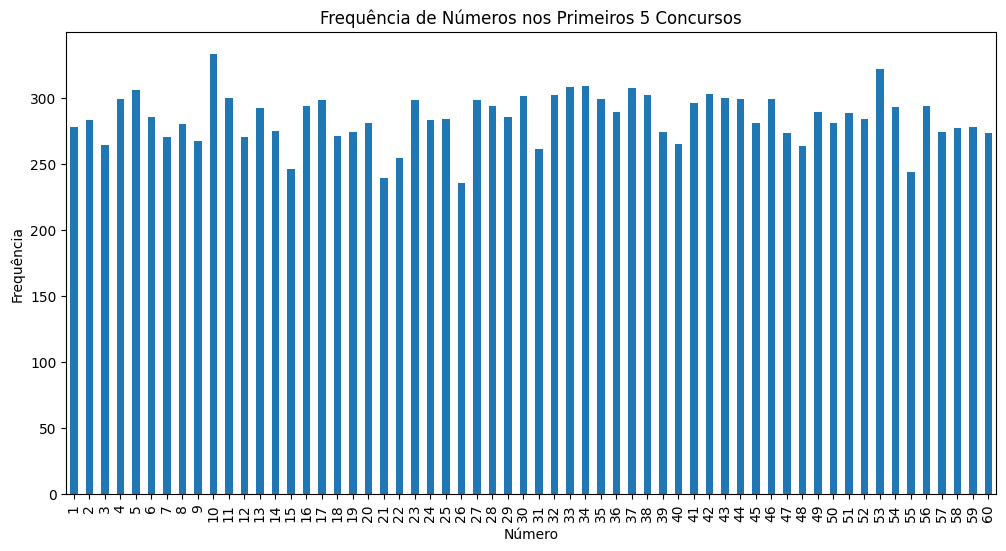

In [19]:
# 3. Visualização
plt.figure(figsize=(12, 6))
frequencia.plot(kind='bar')
plt.title("Frequência de Números nos Primeiros 5 Concursos")
plt.xlabel("Número")
plt.ylabel("Frequência")
plt.show()

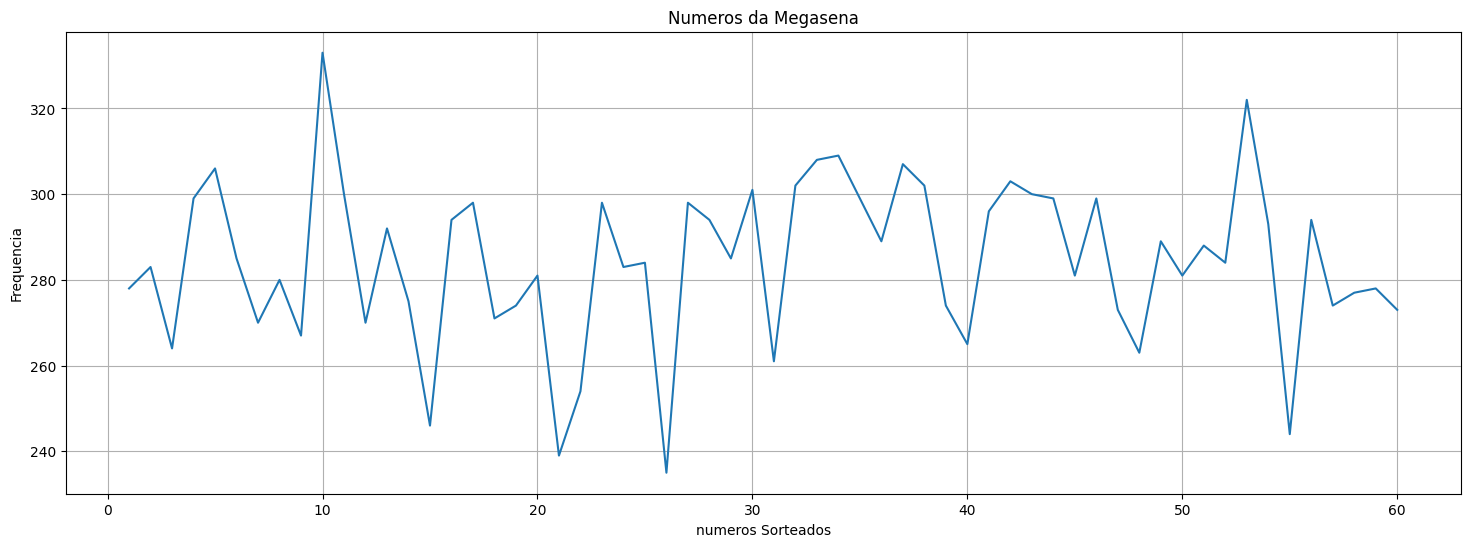

In [24]:
# Cria o gráfico da série temporal (sem formatação)
plt.figure(figsize = (18, 6))
plt.plot(frequencia)
plt.xlabel('numeros Sorteados')
plt.ylabel('Frequencia')
plt.title('Numeros da Megasena')
plt.grid(True)
plt.show()

In [25]:
# 4. Previsão com Machine Learning (exemplo simplificado)
# Criar features (atrasos)
for i in range(1, 6):
    for bola in range(1, 7):
        df[f'bola {bola}_lag{i}'] = df[f'bola {bola}'].shift(i)

In [27]:
# Remover NA
df = df.dropna()

# Preparar dados para modelo
X = df[[col for col in df.columns if 'lag' in col]]
y = df[['bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6']]

In [28]:
# Dividir em treino e teste (opcional)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:

# Criar e treinar modelo (RandomForest para classificação)
from sklearn.ensemble import RandomForestClassifier

In [40]:

# Para cada bola (1-6), treinar um classificador separado
models = {}
for bola in range(1, 7):
    print(f"Treinando modelo para bola {bola}...")
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train[f'bola {bola}'])
    models[f'bola {bola}'] = model

Treinando modelo para bola 1...
Treinando modelo para bola 2...
Treinando modelo para bola 3...
Treinando modelo para bola 4...
Treinando modelo para bola 5...
Treinando modelo para bola 6...


In [41]:
def predict_all_concertos(df, models):
    predictions = []
    for i, row in df.iterrows():
        # Preparar features para previsão
        X_pred = row[[col for col in df.columns if 'lag' in col]].values.reshape(1, -1)

        # Prever cada bola
        pred_concurso = []
        for bola in range(1, 7):
            pred = models[f'bola {bola}'].predict(X_pred)[0]
            pred_concurso.append(pred)
        predictions.append(sorted(pred_concurso))
    return predictions # Adjusted indentation to align with the outer loop

In [ ]:
# Adicionar previsões ao DataFrame
df['previsao'] = predict_all_concertos(df, models)

In [70]:
# 6. Prever o próximo concurso
def predict_next_concurso(df, models, n_lags=5): #n_lags is defined here as a parameter

    # Pegar os últimos valores necessários
    last_values = {}
    for bola in range(1, 7):
        for lag in range(1, n_lags+1): #n_lags is used within the function's scope
            last_values[f'bola {bola}_lag{lag}'] = df[f'bola {bola}'].iloc[-lag]

    # Criar array de features na ordem correta
    X_next = []
    for lag in range(1, n_lags+1): # n_lags is still within the function's scope
        for bola in range(1, 7):
            X_next.append(last_values[f'bola {bola}_lag{lag}'])
    X_next = np.array(X_next).reshape(1, -1)

    # Fazer previsão para cada bola
    pred_concurso = []
    for bola in range(1, 7):
        pred = models[f'bola {bola}'].predict(X_next)[0]
        pred_concurso.append(pred)
    return sorted(pred_concurso)

     # Fazer previsão para cada bola
    pred_concurso = []
    for bola in range(1, 7):
        pred = models[f'bola {bola}'].predict(X_next)[0]
        pred_concurso.append(pred)
    return sorted(pred_concurso)

In [75]:
# Prever próximo concurso
proximo_concurso = predict_next_concurso(df, models)
print("\nPrevisão para o próximo concurso:", proximo_concurso)


Previsão para o próximo concurso: [np.int64(2), np.int64(31), np.int64(33), np.int64(46), np.int64(53), np.int64(57)]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

In [77]:
# Mostrar últimos concursos com previsões
print("\nPrevisão para o próximo concurso:", proximo_concurso)
print("\nÚltimos concursos com previsões:")
print(df[['bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6', 'previsao']].tail())


Previsão para o próximo concurso: [np.int64(2), np.int64(31), np.int64(33), np.int64(46), np.int64(53), np.int64(57)]

Últimos concursos com previsões:
      bola 1  bola 2  bola 3  bola 4  bola 5  bola 6                 previsao
2839      57      39      49      60      33       1   [1, 3, 20, 40, 53, 54]
2840       5      12      36      34      48       4   [4, 5, 12, 34, 36, 48]
2841      49       8       4      52      55      51   [4, 8, 49, 51, 52, 55]
2842      59      40      43      37       1      39  [4, 12, 18, 45, 48, 53]
2843       7      20      54      55      58      31  [5, 13, 15, 24, 25, 59]
